## Assignment - Build a confidence interval

A confidence interval refers to a neighborhood around some point estimate, the size of which is determined by the desired p-value. For instance, we might say that 52% of Americans prefer tacos to burritos, with a 95% confidence interval of +/- 5%.

52% (0.52) is the point estimate, and +/- 5% (the interval $[0.47, 0.57]$) is the confidence interval. "95% confidence" means a p-value $\leq 1 - 0.95 = 0.05$.

In this case, the confidence interval includes $0.5$ - which is the natural null hypothesis (that half of Americans prefer tacos and half burritos, thus there is no clear favorite). So in this case, we could use the confidence interval to report that we've failed to reject the null hypothesis.

But providing the full analysis with a confidence interval, including a graphical representation of it, can be a helpful and powerful way to tell your story. Done well, it is also more intuitive to a layperson than simply saying "fail to reject the null hypothesis" - it shows that in fact the data does *not* give a single clear result (the point estimate) but a whole range of possibilities.

How is a confidence interval built, and how should it be interpreted? It does *not* mean that 95% of the data lies in that interval - instead, the frequentist interpretation is "if we were to repeat this experiment 100 times, we would expect the average result to lie in this interval ~95 times."

For a 95% confidence interval and a normal(-ish) distribution, you can simply remember that +/-2 standard deviations contains 95% of the probability mass, and so the 95% confidence interval based on a given sample is centered at the mean (point estimate) and has a range of +/- 2 (or technically 1.96) standard deviations.

Different distributions/assumptions (90% confidence, 99% confidence) will require different math, but the overall process and interpretation (with a frequentist approach) will be the same.

Your assignment - using the data from the prior module ([congressional voting records](https://archive.ics.uci.edu/ml/datasets/Congressional+Voting+Records)):


### Confidence Intervals:
1. Generate and numerically represent a confidence interval
2. Graphically (with a plot) represent the confidence interval
3. Interpret the confidence interval - what does it tell you about the data and its distribution?

### Chi-squared tests:
4. Take a dataset that we have used in the past in class that has **categorical** variables. Pick two of those categorical variables and run a chi-squared tests on that data
  - By hand using Numpy
  - In a single line using Scipy


In [0]:
import pandas as pd 
import numpy as np
from scipy.stats import ttest_ind
from scipy import stats


In [0]:
import seaborn as sns
import matplotlib.pyplot as plt


In [0]:
col_head = ['party',
'handicapped infants', 'water project cost sharing',
'adoption of the budget resolution', 'physician fee freeze', 'el salvador aid', 'religious groups in schools',
'anti satellite test ban', 'aid to nicaraguan contras', 'mx missile',
'immigration', 'synfuels corporation cutback',
'education spending', 'superfund right to sue', 'crime', 'duty free exports',
'export administration act south africa']


voters = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data', header=None, names=col_head)
voters = voters.replace({'?':np.NaN, 'n':0, 'y':1})
rep = voters[voters.party =='republican']
dem = voters[voters.party =='democrat']



In [0]:
def confidence_interval(data, confidence=0.95):

  data = np.array(data)
  mean = np.mean(data)
  n = len(data)
  stderr = stats.sem(data)
  margin = stderr * stats.t.ppf((1 + confidence) / 2.0, n - 1)
  return (mean, mean - margin, mean + margin)


In [14]:
eg1 = confidence_interval(rep['el salvador aid'].dropna())
eg2 = confidence_interval(dem['el salvador aid'].dropna())
print(eg1)
print()
print(eg2)

(0.9515151515151515, 0.9183979451371699, 0.9846323578931332)

(0.21568627450980393, 0.1648631139997972, 0.26650943501981067)


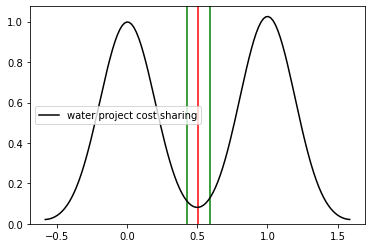

In [15]:
con_int1 = confidence_interval(rep['water project cost sharing'].dropna())
plt.axvline(x=con_int1[1], color='g')
plt.axvline(x=con_int1[2], color='g')
plt.axvline(x=con_int1[0], color='r')
sns.kdeplot(rep['water project cost sharing'], color='black');

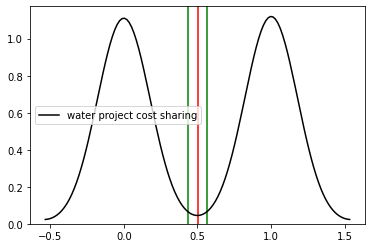

In [16]:

con_int2 = confidence_interval(dem['water project cost sharing'].dropna())
plt.axvline(x=con_int2[1], color='g')
plt.axvline(x=con_int2[2], color='g')
plt.axvline(x=con_int2[0], color='r')
sns.kdeplot(dem['water project cost sharing'], color='black');


These two density graphs the votes from democrats and republicans for a particular issue. 

The two red lines are the mean votes for democrats and republicans, respectively. 

The green lines are the upper and lower bounds of the confidence intervals. 

We can see that both means lie well within both confidence intervals.

And so on this particicular issue we fail to reject the null hypothesis that both parties vote same, since in this example, the differences are not statistically significant at the 95% confidence level. 



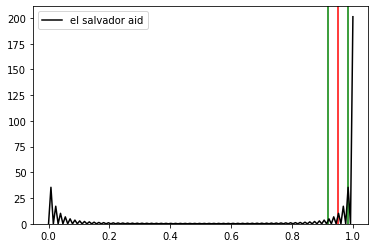

In [17]:
con_int3 = confidence_interval(rep['el salvador aid'].dropna())
plt.axvline(x=con_int3[1], color='g')
plt.axvline(x=con_int3[2], color='g')
plt.axvline(x=con_int3[0], color='r')
sns.kdeplot(rep['el salvador aid'], color='black');

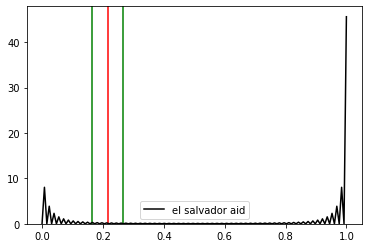

In [18]:

con_int4 = confidence_interval(dem['el salvador aid'].dropna())
plt.axvline(x=con_int4[1], color='g')
plt.axvline(x=con_int4[2], color='g')
plt.axvline(x=con_int4[0], color='r')
sns.kdeplot(dem['el salvador aid'], color='black');

Chi-squared tests: 

Take a dataset that we have used in the past in class that has categorical variables. Pick two of those categorical variables and run a chi-squared tests on that data.

1. By hand using Numpy  
2. In a single line using Scipy

In [0]:
iowa_df = pd.read_csv("https://raw.githubusercontent.com/ryanleeallred/datasets/master/Ames%20Housing%20Data/train.csv")

In [28]:
iowa_df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [29]:
#create a new catagorical variable 
iowa_df["NormalCondition"] = np.where(iowa_df["SaleCondition"]=="Normal", "Yes", "No")
iowa_df["NormalCondition"].value_counts()

Yes    1198
No      262
Name: NormalCondition, dtype: int64

In [30]:
iowa_df["LotShape"].value_counts()

Reg    925
IR1    484
IR2     41
IR3     10
Name: LotShape, dtype: int64

In [31]:
iowa_df["LotShape3"] = iowa_df["LotShape"].map({"Reg":"Regular", "IR1":"Irregular", "IR2":"Other", "IR3":"Other"})
iowa_df["LotShape3"].value_counts()

Regular      925
Irregular    484
Other         51
Name: LotShape3, dtype: int64

In [34]:
table1= pd.crosstab(iowa_df['NormalCondition'], iowa_df['LotShape3'], margins=True)
table1.head

LotShape3,Irregular,Other,Regular,All
NormalCondition,,,,
No,86,9,167,262
Yes,398,42,758,1198
All,484,51,925,1460


In [47]:
row_sums = table1.iloc[0:2, 3].values
row_sums

array([ 262, 1198])

In [48]:
row_sums = table1.iloc[0:2, 3].values
col_sums = table1.iloc[2, 0:3].values
total = table1.loc['All','All']
print(row_sums)
print(col_sums)

expected = []
for i in range(len(row_sums)):
  expected_row = []
  for column in col_sums:
    expected_val = column*row_sums[i]/total
    expected_row.append(expected_val)
  expected.append(expected_row)
expected = np.array(expected)
print(expected.shape) 

[ 262 1198]
[484  51 925]
(2, 3)


In [50]:
observed = pd.crosstab(iowa_df['NormalCondition'], iowa_df['LotShape3']).values
chi_squared = ((observed - expected)**2/(expected)).sum() 
dof = (len(row_sums)-1)*(len(col_sums)-1)

print(chi_squared)
print(dof)
print(expected) 

0.020773950605841196
2
[[ 86.85479452   9.15205479 165.99315068]
 [397.14520548  41.84794521 759.00684932]]


In [51]:
chi_squared, p_value, dof, expected = stats.chi2_contingency(observed)

print(f"Chi-Squared: {chi_squared}")
print(f"P-value: {p_value}")
print(f"Degrees of Freedom: {dof}") 
print("Expected: \n", np.array(expected))

Chi-Squared: 0.020773950605841196
P-value: 0.9896667830352097
Degrees of Freedom: 2
Expected: 
 [[ 86.85479452   9.15205479 165.99315068]
 [397.14520548  41.84794521 759.00684932]]


In [0]:
iowa_df['SaleCondition'].value_counts()
iowa_df['LotShape'].value_counts()

In [0]:
table= pd.crosstab(iowa_df['SaleCondition'], iowa_df['LotShape'], margins=True)

In [0]:
row = table.iloc[0:4, 4].values
col = table.iloc[4, 0:4].values
tot = table.loc['All','All']
print(row)
print(col)
exptd = []
for i in range(len(row)):
  exptd_row = []
  for colmn in col:
    exptd_val = colmn*row[i]/tot
    exptd_row.append(exptd_val)
  exptd.append(exptd_row)
exptd = np.array(exptd)
print(exptd.shape)

In [0]:
obsrvd = pd.crosstab(iowa_df['SaleCondition'], iowa_df['LotShape']).values
ch_sq = ((obsrvd - exptd)**2/(exptd)).sum()
do_f = (len(row)-1)*(len(col)-1)

print(ch_sq)
print(do_f)
print(exptd) 

## Stretch goals:

1. Write a summary of your findings, mixing prose and math/code/results. *Note* - yes, this is by definition a political topic. It is challenging but important to keep your writing voice *neutral* and stick to the facts of the data. Data science often involves considering controversial issues, so it's important to be sensitive about them (especially if you want to publish).
2. Apply the techniques you learned today to your project data or other data of your choice, and write/discuss your findings here.
3. Refactor your code so it is elegant, readable, and can be easily run for all issues.

## Resources

- [Interactive visualize the Chi-Squared test](https://homepage.divms.uiowa.edu/~mbognar/applets/chisq.html)
- [Calculation of Chi-Squared test statistic](https://en.wikipedia.org/wiki/Pearson%27s_chi-squared_test)
- [Visualization of a confidence interval generated by R code](https://commons.wikimedia.org/wiki/File:Confidence-interval.svg)
- [Expected value of a squared standard normal](https://math.stackexchange.com/questions/264061/expected-value-calculation-for-squared-normal-distribution) (it's 1 - which is why the expected value of a Chi-Squared with $n$ degrees of freedom is $n$, as it's the sum of $n$ squared standard normals)